In [ ]:
import h5py
# Open the HDF5 file in read mode
with h5py.File('C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5', 'r') as file:
    # Access the 'grid' group and then the 'tracks' group within it
    if 'grid' in file:
        grid_group = file['grid']
        
        # Check if 'tracks' exists within 'grid'
        if 'tracks' in grid_group:
            tracks_group = grid_group['tracks']
            
            # List all items in 'tracks' group
            print("Contents of 'tracks' group:")
            for item_name in tracks_group:
                item = tracks_group[item_name]
                
                if isinstance(item, h5py.Dataset):
                    print(f"Dataset: {item_name} - shape: {item.shape}, dtype: {item.dtype}")
                elif isinstance(item, h5py.Group):
                    print(f"Group: {item_name}")
                    
                # Additional attributes of datasets can also be printed
                if hasattr(item, 'attrs'):
                    print(f"  Attributes of {item_name}: {dict(item.attrs)}")
        else:
            print("'tracks' group not found within 'grid'")
    else:
        print("'grid' group not found in the file.")



Contents of 'tracks' group:
Group: track00001
  Attributes of track00001: {}
Group: track00002
  Attributes of track00002: {}
Group: track00003
  Attributes of track00003: {}
Group: track00004
  Attributes of track00004: {}
Group: track00005
  Attributes of track00005: {}
Group: track00006
  Attributes of track00006: {}
Group: track00007
  Attributes of track00007: {}
Group: track00008
  Attributes of track00008: {}
Group: track00009
  Attributes of track00009: {}
Group: track00010
  Attributes of track00010: {}
Group: track00011
  Attributes of track00011: {}
Group: track00012
  Attributes of track00012: {}
Group: track00013
  Attributes of track00013: {}
Group: track00014
  Attributes of track00014: {}
Group: track00016
  Attributes of track00016: {}
Group: track00017
  Attributes of track00017: {}
Group: track00018
  Attributes of track00018: {}
Group: track00019
  Attributes of track00019: {}
Group: track00020
  Attributes of track00020: {}
Group: track00021
  Attributes of track00

In [15]:
import h5py

with h5py.File('C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5', 'r') as file:
    tracks_group = file['grid/tracks']
    
    # Manually check a few specific tracks
    for track_name in ['track00001', 'track00002', 'track00003']:
        if track_name in tracks_group:
            track = tracks_group[track_name]
            print(f"Contents of '{track_name}':")
            for item_name, item in track.items():
                print(f"  {item_name} - {'Dataset' if isinstance(item, h5py.Dataset) else 'Group'}")
                
                # Display dataset properties if it’s a dataset
                if isinstance(item, h5py.Dataset):
                    print(f"    Shape: {item.shape}, Dtype: {item.dtype}")
                    print(f"    Attributes: {dict(item.attrs)}")


Contents of 'track00001':
  BP_GAIA - Dataset
    Shape: (881,), Dtype: float64
    Attributes: {'Plot string': b'$G_\\mathrm{BP}$', 'Remark': b'$G_\\mathrm{BP}$ magnitude in the Gaia photometric system', 'Unit': b'mag'}
  FeH - Dataset
    Shape: (881,), Dtype: float64
    Attributes: {'Plot string': b'[Fe/H] (dex)', 'Remark': b'Iron abundance', 'Unit': b'dex'}
  FeHini - Dataset
    Shape: (881,), Dtype: float64
    Attributes: {'Plot string': b'[Fe/H]$_\\mathrm{ini}$ (dex)', 'Remark': b'Initial iron abundance', 'Unit': b'dex'}
  G_GAIA - Dataset
    Shape: (881,), Dtype: float64
    Attributes: {'Plot string': b'$G$', 'Remark': b'$G$ magnitude in the Gaia photometric system', 'Unit': b'mag'}
  LPhot - Dataset
    Shape: (881,), Dtype: float64
    Attributes: {'Plot string': b'$L$ (L$_\\odot$)', 'Remark': b'Photospheric luminosity', 'Unit': b'solar'}
  MMaxNucE - Dataset
    Shape: (881,), Dtype: float64
    Attributes: {'Plot string': b'M$_\\mathrm{max}(\\epsilon)$ (m/M)', 'Remark':

In [28]:
import numpy as np
import matplotlib.pyplot as plt
file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'

with h5py.File(file_path, 'r') as f:
    # Access the datasets for temperature and luminosity in the specified group
    Teff = f['grid/tracks/track00001/Teff'][:]     # Effective Temperature array
    LPhot = f['grid/tracks/track00001/LPhot'][:]   # Photospheric Luminosity array

LPhot = LPhot * 3.828 * 10**26
print("Teff:", Teff[:5])  # Print the first few values
print("LPhot:", LPhot[:5])




Teff: [6616.085448 6615.816533 6615.652662 6615.28651  6614.479369]
LPhot: [3.634480629691108e+27 3.6347863859656786e+27 3.634952114677067e+27
 3.635304507656787e+27 3.6361018394477377e+27]


C:\Users\Dell\AppData\Local\Temp\ipykernel_5784\409740083.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Teff, LPhot, cmap='inferno', s=1)


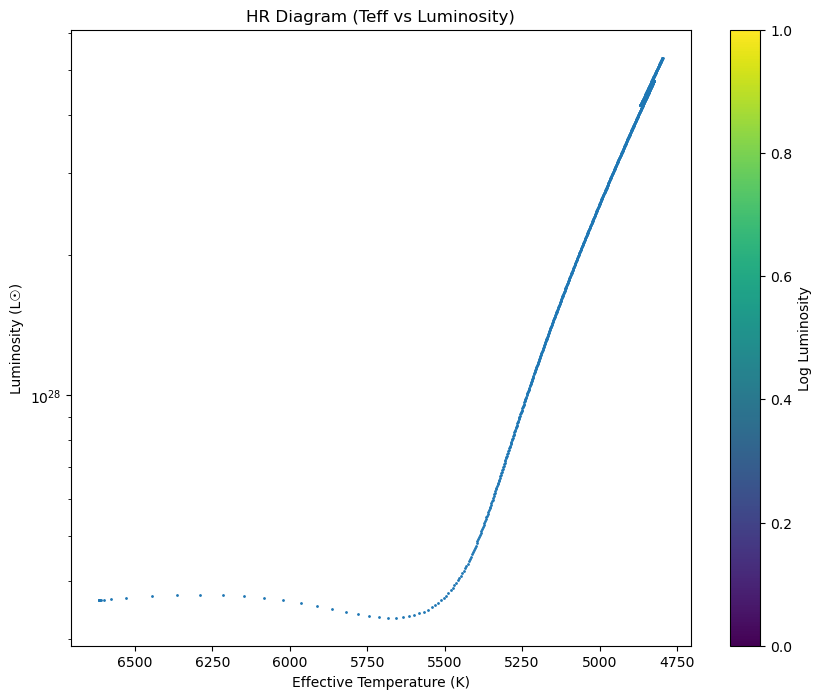

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(Teff, LPhot, cmap='inferno', s=1)
plt.colorbar(label="Log Luminosity")
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (L☉)")
plt.yscale('log')
plt.gca().invert_xaxis()  # Invert x-axis for HR diagram convention
plt.title("HR Diagram (Teff vs Luminosity)")
plt.show()